# Data Importing and Formatting
___

In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime, time as dt_time, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
df = pd.read_csv("~/Downloads/complete_dataset.csv")
df['emotion'].value_counts()

Power            66399
Peacefulness     65415
Nostalgia        53689
Transcendence    51581
Sadness          45889
Tension          43705
Joyful           42443
Wonder           42187
Tenderness       38080
Name: emotion, dtype: int64

In [3]:
attack_arr = np.genfromtxt("../data/test/training_attack_types.txt", dtype=str)
attack_dict = {}
for pair in attack_arr:
    attack_dict[pair[0]] = pair[1]
attack_dict

{'back': 'dos',
 'buffer_overflow': 'u2r',
 'ftp_write': 'r2l',
 'guess_passwd': 'r2l',
 'imap': 'r2l',
 'ipsweep': 'probe',
 'land': 'dos',
 'loadmodule': 'u2r',
 'multihop': 'r2l',
 'neptune': 'dos',
 'nmap': 'probe',
 'perl': 'u2r',
 'phf': 'r2l',
 'pod': 'dos',
 'portsweep': 'probe',
 'rootkit': 'u2r',
 'satan': 'probe',
 'smurf': 'dos',
 'spy': 'r2l',
 'teardrop': 'dos',
 'warezclient': 'r2l',
 'warezmaster': 'r2l'}

In [4]:
names = np.genfromtxt("../data/kddcup.names.txt", dtype=str, encoding=None, skip_header=1)
cols = np.append(names.transpose()[0], "labels")

In [5]:
test_df = pd.read_csv("../data/test/corrected")
test_df.columns = cols
test_df.head(10)

,duration:,protocol_type:,service:,flag:,src_bytes:,dst_bytes:,land:,wrong_fragment:,urgent:,hot:,...,dst_host_srv_count:,dst_host_same_srv_rate:,dst_host_diff_srv_rate:,dst_host_same_src_port_rate:,dst_host_srv_diff_host_rate:,dst_host_serror_rate:,dst_host_srv_serror_rate:,dst_host_rerror_rate:,dst_host_srv_rerror_rate:,labels
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0,snmpgetattack.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.00,0.01,0.01,0.00,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,255,1.00,0.00,0.01,0.00,0.0,0.0,0.0,0.0,snmpgetattack.
5,0,udp,domain_u,SF,29,0,0,0,0,0,...,3,0.30,0.30,0.30,0.00,0.0,0.0,0.0,0.0,normal.
6,0,udp,private,SF,105,146,0,0,0,0,...,253,0.99,0.01,0.00,0.00,0.0,0.0,0.0,0.0,normal.
7,0,udp,private,SF,105,146,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0,snmpgetattack.
8,0,tcp,http,SF,223,185,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.0,0.0,0.0,0.0,normal.
9,0,udp,private,SF,105,146,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0,snmpgetattack.


In [6]:
train_10pct_df = pd.read_csv("../data/train/kddcup.data_10_percent")
train_10pct_df.columns = cols
train_10pct_df.head(10)

,duration:,protocol_type:,service:,flag:,src_bytes:,dst_bytes:,land:,wrong_fragment:,urgent:,hot:,...,dst_host_srv_count:,dst_host_same_srv_rate:,dst_host_diff_srv_rate:,dst_host_same_src_port_rate:,dst_host_srv_diff_host_rate:,dst_host_serror_rate:,dst_host_srv_serror_rate:,dst_host_rerror_rate:,dst_host_srv_rerror_rate:,labels
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
5,0,tcp,http,SF,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal.
6,0,tcp,http,SF,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal.
7,0,tcp,http,SF,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal.
8,0,tcp,http,SF,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal.
9,0,tcp,http,SF,210,624,0,0,0,0,...,109,1.0,0.0,0.06,0.05,0.0,0.0,0.0,0.0,normal.


In [7]:
train_10pct_df = train_10pct_df.dropna()
test_df = test_df.dropna()
train_10pct_df['labels'] = train_10pct_df['labels'].str.replace(".", "")
train_10pct_df['attack'] = train_10pct_df['labels'].replace(attack_dict)
train_10pct_df.head(10)

/var/folders/gx/j98lvm7j4pvds6m3w0frhncw0000gn/T/ipykernel_1053/1899192568.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train_10pct_df['labels'] = train_10pct_df['labels'].str.replace(".", "")


,duration:,protocol_type:,service:,flag:,src_bytes:,dst_bytes:,land:,wrong_fragment:,urgent:,hot:,...,dst_host_same_srv_rate:,dst_host_diff_srv_rate:,dst_host_same_src_port_rate:,dst_host_srv_diff_host_rate:,dst_host_serror_rate:,dst_host_srv_serror_rate:,dst_host_rerror_rate:,dst_host_srv_rerror_rate:,labels,attack
0,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal,normal
1,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal,normal
2,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal,normal
3,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal,normal
5,0,tcp,http,SF,212,1940,0,0,0,0,...,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal,normal
6,0,tcp,http,SF,159,4087,0,0,0,0,...,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal,normal
7,0,tcp,http,SF,210,151,0,0,0,0,...,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal,normal
8,0,tcp,http,SF,212,786,0,0,0,1,...,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal,normal
9,0,tcp,http,SF,210,624,0,0,0,0,...,1.0,0.0,0.06,0.05,0.0,0.0,0.0,0.0,normal,normal


In [8]:
len(train_10pct_df)

494020

In [9]:
test_df['labels'] = test_df['labels'].str.replace(".", "")
test_df['attack'] = test_df['labels'].replace(attack_dict)
test_df.head(10)

/var/folders/gx/j98lvm7j4pvds6m3w0frhncw0000gn/T/ipykernel_1053/1711182056.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test_df['labels'] = test_df['labels'].str.replace(".", "")


,duration:,protocol_type:,service:,flag:,src_bytes:,dst_bytes:,land:,wrong_fragment:,urgent:,hot:,...,dst_host_same_srv_rate:,dst_host_diff_srv_rate:,dst_host_same_src_port_rate:,dst_host_srv_diff_host_rate:,dst_host_serror_rate:,dst_host_srv_serror_rate:,dst_host_rerror_rate:,dst_host_srv_rerror_rate:,labels,attack
0,0,udp,private,SF,105,146,0,0,0,0,...,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0,normal,normal
1,0,udp,private,SF,105,146,0,0,0,0,...,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0,normal,normal
2,0,udp,private,SF,105,146,0,0,0,0,...,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0,snmpgetattack,snmpgetattack
3,0,udp,private,SF,105,146,0,0,0,0,...,1.00,0.01,0.01,0.00,0.0,0.0,0.0,0.0,snmpgetattack,snmpgetattack
4,0,udp,private,SF,105,146,0,0,0,0,...,1.00,0.00,0.01,0.00,0.0,0.0,0.0,0.0,snmpgetattack,snmpgetattack
5,0,udp,domain_u,SF,29,0,0,0,0,0,...,0.30,0.30,0.30,0.00,0.0,0.0,0.0,0.0,normal,normal
6,0,udp,private,SF,105,146,0,0,0,0,...,0.99,0.01,0.00,0.00,0.0,0.0,0.0,0.0,normal,normal
7,0,udp,private,SF,105,146,0,0,0,0,...,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0,snmpgetattack,snmpgetattack
8,0,tcp,http,SF,223,185,0,0,0,0,...,1.00,0.00,0.01,0.01,0.0,0.0,0.0,0.0,normal,normal
9,0,udp,private,SF,105,146,0,0,0,0,...,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0,snmpgetattack,snmpgetattack


In [10]:
train_10pct_df['attack'].value_counts().index

Index(['dos', 'normal', 'probe', 'r2l', 'u2r'], dtype='object')

In [11]:
test_supervised_df = test_df[test_df['attack'].isin(train_10pct_df['attack'].value_counts().index)]
test_supervised_df['attack'].value_counts()

dos       223298
normal     60592
r2l         5993
probe       2377
u2r           39
Name: attack, dtype: int64

In [12]:
train_10pct_df.dtypes

duration:                         int64
protocol_type:                   object
service:                         object
flag:                            object
src_bytes:                        int64
dst_bytes:                        int64
land:                             int64
wrong_fragment:                   int64
urgent:                           int64
hot:                              int64
num_failed_logins:                int64
logged_in:                        int64
num_compromised:                  int64
root_shell:                       int64
su_attempted:                     int64
num_root:                         int64
num_file_creations:               int64
num_shells:                       int64
num_access_files:                 int64
num_outbound_cmds:                int64
is_host_login:                    int64
is_guest_login:                   int64
count:                            int64
srv_count:                        int64
serror_rate:                    float64


In [13]:
train_10pct_df.iloc[:,1:4]

,protocol_type:,service:,flag:
0,tcp,http,SF
1,tcp,http,SF
2,tcp,http,SF
3,tcp,http,SF
4,tcp,http,SF
...,...,...,...
494015,tcp,http,SF
494016,tcp,http,SF
494017,tcp,http,SF
494018,tcp,http,SF


In [14]:
train_10pct_df['service:'].value_counts()

ecr_i      281400
private    110893
http        64292
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
pm_dump         1
tftp_u          1
red_i           1
Name: service:, Length: 66, dtype: int64

In [15]:
# Because test had more samples than train, we train the OHE on the test set
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
app_test = pd.DataFrame(ohe.fit_transform(test_supervised_df.iloc[:, 1:4]))
app_test

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292294,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
292295,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
292296,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
292297,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
# transform the training set
app_train = pd.DataFrame(ohe.transform(train_10pct_df.iloc[:, 1:4]))
app_train

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
494016,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
494017,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
494018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
train_10pct_df.drop(columns=["protocol_type:", "service:", "flag:"], inplace=True)
train_10pct_df.head(10)

,duration:,src_bytes:,dst_bytes:,land:,wrong_fragment:,urgent:,hot:,num_failed_logins:,logged_in:,num_compromised:,...,dst_host_same_srv_rate:,dst_host_diff_srv_rate:,dst_host_same_src_port_rate:,dst_host_srv_diff_host_rate:,dst_host_serror_rate:,dst_host_srv_serror_rate:,dst_host_rerror_rate:,dst_host_srv_rerror_rate:,labels,attack
0,0,239,486,0,0,0,0,0,1,0,...,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal,normal
1,0,235,1337,0,0,0,0,0,1,0,...,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal,normal
2,0,219,1337,0,0,0,0,0,1,0,...,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal,normal
3,0,217,2032,0,0,0,0,0,1,0,...,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal,normal
4,0,217,2032,0,0,0,0,0,1,0,...,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal,normal
5,0,212,1940,0,0,0,0,0,1,0,...,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal,normal
6,0,159,4087,0,0,0,0,0,1,0,...,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal,normal
7,0,210,151,0,0,0,0,0,1,0,...,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal,normal
8,0,212,786,0,0,0,1,0,1,0,...,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal,normal
9,0,210,624,0,0,0,0,0,1,0,...,1.0,0.0,0.06,0.05,0.0,0.0,0.0,0.0,normal,normal


In [18]:
len(train_10pct_df) == len(app_train)

True

In [19]:
train_10pct_df_app = pd.concat([train_10pct_df.reset_index(), app_train], axis=1)
train_10pct_df_app = train_10pct_df_app.drop(columns="index")
train_10pct_df_app

,duration:,src_bytes:,dst_bytes:,land:,wrong_fragment:,urgent:,hot:,num_failed_logins:,logged_in:,num_compromised:,...,68,69,70,71,72,73,74,75,76,77
0,0,239,486,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,235,1337,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,219,1337,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,217,2032,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,217,2032,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,310,1881,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
494016,0,282,2286,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
494017,0,203,1200,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
494018,0,291,1200,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
test_supervised_df.drop(columns=["protocol_type:", "service:", "flag:"], inplace=True)
test_supervised_df.head(10)

/var/folders/gx/j98lvm7j4pvds6m3w0frhncw0000gn/T/ipykernel_1053/634532487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_supervised_df.drop(columns=["protocol_type:", "service:", "flag:"], inplace=True)


,duration:,src_bytes:,dst_bytes:,land:,wrong_fragment:,urgent:,hot:,num_failed_logins:,logged_in:,num_compromised:,...,dst_host_same_srv_rate:,dst_host_diff_srv_rate:,dst_host_same_src_port_rate:,dst_host_srv_diff_host_rate:,dst_host_serror_rate:,dst_host_srv_serror_rate:,dst_host_rerror_rate:,dst_host_srv_rerror_rate:,labels,attack
0,0,105,146,0,0,0,0,0,0,0,...,1.00,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,normal
1,0,105,146,0,0,0,0,0,0,0,...,1.00,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,normal
5,0,29,0,0,0,0,0,0,0,0,...,0.30,0.30,0.30,0.00,0.00,0.0,0.00,0.00,normal,normal
6,0,105,146,0,0,0,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,normal
8,0,223,185,0,0,0,0,0,1,0,...,1.00,0.00,0.01,0.01,0.00,0.0,0.00,0.00,normal,normal
10,0,230,260,0,0,0,0,0,1,0,...,1.00,0.00,0.33,0.07,0.33,0.0,0.00,0.00,normal,normal
11,0,105,146,0,0,0,0,0,0,0,...,1.00,0.01,0.01,0.00,0.00,0.0,0.00,0.00,normal,normal
13,1,3170,329,0,0,0,0,0,1,0,...,0.72,0.11,0.02,0.00,0.02,0.0,0.09,0.13,normal,normal
14,0,297,13787,0,0,0,0,0,1,0,...,1.00,0.00,0.01,0.01,0.00,0.0,0.00,0.00,normal,normal
15,0,291,3542,0,0,0,0,0,1,0,...,1.00,0.00,0.01,0.01,0.00,0.0,0.00,0.00,normal,normal


In [21]:
len(test_supervised_df) == len(app_test)

True

In [22]:
test_supervised_df_app = pd.concat([test_supervised_df.reset_index(), app_test], axis=1)
test_supervised_df_app = test_supervised_df_app.drop(columns='index')
test_supervised_df_app

,duration:,src_bytes:,dst_bytes:,land:,wrong_fragment:,urgent:,hot:,num_failed_logins:,logged_in:,num_compromised:,...,68,69,70,71,72,73,74,75,76,77
0,0,105,146,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,105,146,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,29,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,105,146,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,223,185,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292294,0,105,147,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
292295,0,105,147,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
292296,0,105,147,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
292297,0,105,147,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Data visualization
___

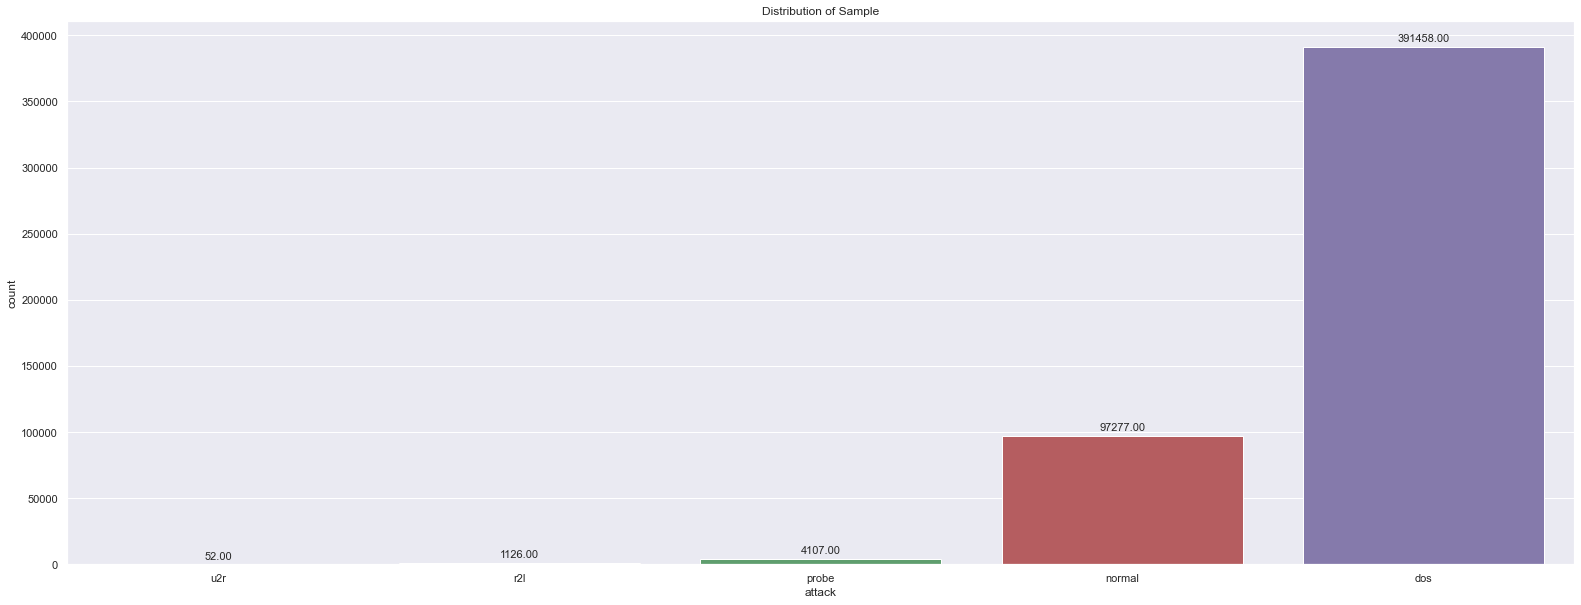

In [23]:
sns.set(rc={"figure.figsize":(27, 10)}) #width=8, height=4
g = sns.countplot(data=train_10pct_df, x="attack", order=train_10pct_df["attack"].value_counts().index[::-1])
for bar in g.patches:

  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    g.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=11, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Distribution of Sample")
plt.show()

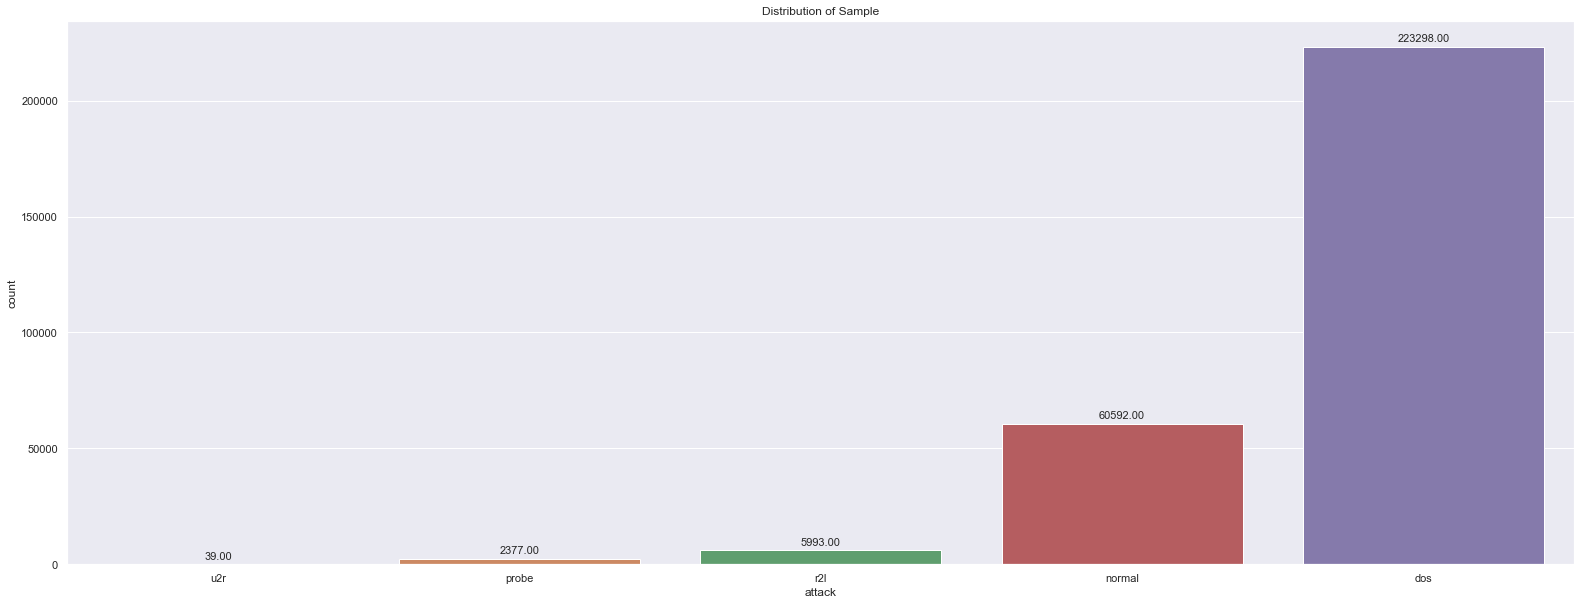

In [24]:
sns.set(rc={"figure.figsize":(27, 10)}) #width=8, height=4
g = sns.countplot(data=test_supervised_df, x="attack", order=test_supervised_df["attack"].value_counts().index[::-1])
for bar in g.patches:

  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    g.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=11, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Distribution of Sample")
plt.show()

# Data Prediction
___

In [25]:
train_10pct_df['attack'].value_counts()

dos       391458
normal     97277
probe       4107
r2l         1126
u2r           52
Name: attack, dtype: int64

In [26]:
total = 0
for i in train_10pct_df['attack'].value_counts():
    total += i

In [27]:
weights_for_dos = (1 / train_10pct_df['attack'].value_counts()[0]) * (2.0)
weights_for_normal = (1 / train_10pct_df['attack'].value_counts()[1]) * (2.0)
weights_for_probe = (1 / train_10pct_df['attack'].value_counts()[2]) * (2.0)
weights_for_r2l = (1 / train_10pct_df['attack'].value_counts()[3]) * (2.0)
weights_for_u2r = (1 / train_10pct_df['attack'].value_counts()[4]) * (2.0)

In [28]:
# initialize class weights
#class_weight = {"dos" : weights_for_dos, "normal" : weights_for_normal, "probe" : weights_for_probe, "r2l" : weights_for_r2l, "u2r" : weights_for_u2r}
class_weight = {0 : weights_for_dos, 1 : weights_for_normal, 2 : weights_for_probe, 3 : weights_for_r2l, 4 : weights_for_u2r}

In [29]:
train_10pct_df_app.dtypes

duration:            int64
src_bytes:           int64
dst_bytes:           int64
land:                int64
wrong_fragment:      int64
                    ...   
73                 float64
74                 float64
75                 float64
76                 float64
77                 float64
Length: 118, dtype: object

In [30]:
train_10pct_df_app.iloc[:, 117]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
494015    0.0
494016    0.0
494017    0.0
494018    0.0
494019    0.0
Name: 77, Length: 494020, dtype: float64

In [31]:
train_10pct_df_app.iloc[:, 37]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
494015    0.0
494016    0.0
494017    0.0
494018    0.0
494019    0.0
Name: dst_host_srv_rerror_rate:, Length: 494020, dtype: float64

In [32]:
X_train = train_10pct_df_app.iloc[:, np.r_[0:38, 40:118]]
X_train.values.astype(np.float32)

array([[0.000e+00, 2.390e+02, 4.860e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [0.000e+00, 2.350e+02, 1.337e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [0.000e+00, 2.190e+02, 1.337e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [0.000e+00, 2.030e+02, 1.200e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [0.000e+00, 2.910e+02, 1.200e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [0.000e+00, 2.190e+02, 1.234e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00]], dtype=float32)

In [33]:
y_train = train_10pct_df.iloc[:, -1]
y_train.value_counts()

dos       391458
normal     97277
probe       4107
r2l         1126
u2r           52
Name: attack, dtype: int64

In [34]:
test_supervised_df_app

,duration:,src_bytes:,dst_bytes:,land:,wrong_fragment:,urgent:,hot:,num_failed_logins:,logged_in:,num_compromised:,...,68,69,70,71,72,73,74,75,76,77
0,0,105,146,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,105,146,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,29,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,105,146,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,223,185,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292294,0,105,147,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
292295,0,105,147,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
292296,0,105,147,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
292297,0,105,147,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
X_test = test_supervised_df_app.iloc[:, np.r_[0:38, 40:118]]
X_test.values.astype(np.float32)

array([[  0., 105., 146., ...,   0.,   1.,   0.],
       [  0., 105., 146., ...,   0.,   1.,   0.],
       [  0.,  29.,   0., ...,   0.,   1.,   0.],
       ...,
       [  0., 105., 147., ...,   0.,   1.,   0.],
       [  0., 105., 147., ...,   0.,   1.,   0.],
       [  0., 105., 147., ...,   0.,   1.,   0.]], dtype=float32)

In [36]:
y_test = test_supervised_df.iloc[:, -1]
y_test

0         normal
1         normal
5         normal
6         normal
8         normal
           ...  
311023    normal
311024    normal
311025    normal
311026    normal
311027    normal
Name: attack, Length: 292299, dtype: object

In [37]:
shape_train=X_train.shape[1]
shape_test=X_test.shape[1]
shape_train == shape_test

True

In [38]:
import psutil
from keras.utils import np_utils
import tensorflow as tf
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from ray.tune.integration.keras import TuneReportCallback

In [39]:
encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_test_enc = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
y_test_enc = np_utils.to_categorical(y_test_enc)
y_train_enc = np_utils.to_categorical(y_train_enc)

In [40]:
encoder.classes_

array(['dos', 'normal', 'probe', 'r2l', 'u2r'], dtype=object)

In [41]:
class_weight

{0: 5.109104935906278e-06,
 1: 2.055984456757507e-05,
 2: 0.0004869734599464329,
 3: 0.0017761989342806395,
 4: 0.038461538461538464}

In [42]:
y_test_enc

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [43]:
len(X_test)

292299

In [44]:
len(y_test)

292299

In [45]:
"""
test model
model = Sequential()
model.add(layer=keras.layers.Input(shape=shape_train))
for i in range(5):
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(lr=0.0001, decay=1e-6), metrics=['auc'])
model.fit(X_train, y_train_enc, batch_size=128, validation_data=(X_test, y_test_enc), epochs=5, class_weight=class_weight)
"""

'\ntest model\nmodel = Sequential()\nmodel.add(layer=keras.layers.Input(shape=shape_train))\nfor i in range(5):\n    model.add(Dense(512, activation=\'relu\'))\n    model.add(Dropout(0.5))\n    model.add(BatchNormalization())\nmodel.add(Dropout(0.5))\nmodel.add(Dense(5, activation=\'softmax\'))\nmodel.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(lr=0.0001, decay=1e-6), metrics=[\'auc\'])\nmodel.fit(X_train, y_train_enc, batch_size=128, validation_data=(X_test, y_test_enc), epochs=5, class_weight=class_weight)\n'

In [46]:
import psutil
import tensorflow as tf
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from ray.tune.integration.keras import TuneReportCallback
# TODO: implement checkpointing
def train(config, X_tunetrain=None, y_tunetrain=None, X_tunetest=None, y_tunetest=None):
    model = Sequential()
    model.add(layer=keras.layers.Input(shape=shape_train,))
    for i in range(config['layers']):
        model.add(Dense(config["units"], activation='relu'))
        model.add(Dropout(config['dropout']))
        if config['batchnorm'] == "True": 
            model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))
    model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(lr=config['lr'], decay=1e-6), metrics=['categorical_accuracy'])
    model.fit(X_tunetrain, y_tunetrain, batch_size=config['batch_size'], validation_data=(X_tunetest, y_tunetest), epochs=25, class_weight=class_weight, callbacks=[TuneReportCallback({"categorical_accuracy": "categorical_accuracy"})])

In [47]:
from ray import tune
from ray.tune.schedulers import HyperBandScheduler
config = {
        "batch_size" : tune.grid_search([64,128,256, 512]),
        "layers":      tune.grid_search([i for i in range(1,35,1)]),     # maximum number of layers
        "units":       tune.grid_search([128, 256, 512, 1024]),
        "dropout":     tune.uniform(0, 1),
        "lr":          tune.uniform(0.0001, 0.1),
        "batchnorm" :  tune.choice(["True", "False"])
    }

In [48]:
import ray

In [49]:
hyperband_scheduler = HyperBandScheduler(
    time_attr='training_iteration',
    metric='categorical_accuracy',
    mode='max',
    max_t=10,
    reduction_factor=4)

In [50]:
analysis = tune.run(
    tune.with_parameters(train, X_tunetrain=X_train, y_tunetrain=y_train_enc, X_tunetest=X_test, y_tunetest=y_test_enc),
    name="exp",
    config=config,
    verbose=1,
    max_concurrent_trials=4,
    resources_per_trial={
            "gpu": 0,
            "cpu": 2
        },scheduler=hyperband_scheduler)


1930/1930 [==============================] - 49s 25ms/step - loss: 7.6299e-05 - categorical_accuracy: 0.3681 - val_loss: 1.7381 - val_categorical_accuracy: 0.2184
(train pid=1334) Epoch 4/25
1995/3860 [==============>...............] - ETA: 22s - loss: 0.0025 - categorical_accuracy: 0.0839
